<a href="https://colab.research.google.com/github/Alfia08/SmartClass/blob/main/Copy_of_traffic%26road.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
print(torch.cuda.is_available())


True


In [3]:
!pip install ultralytics opencv-python matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.8 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import zipfile
import os

zip_path = "/content/Traffic and Road Signs.v1i.yolov9.zip"
extract_path = "/content/traffic_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted")

✅ Dataset extracted


In [7]:
!ls /content/traffic_dataset


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [8]:
!cat /content/traffic_dataset/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 29
names: ['-Road narrows on right', '50 mph speed limit', 'Attention Please-', 'Beware of children', 'CYCLE ROUTE AHEAD WARNING', 'Dangerous Left Curve Ahead', 'Dangerous Rright Curve Ahead', 'End of all speed and passing limits', 'Give Way', 'Go Straight or Turn Right', 'Go straight or turn left', 'Keep-Left', 'Keep-Right', 'Left Zig Zag Traffic', 'No Entry', 'No_Over_Taking', 'Overtaking by trucks is prohibited', 'Pedestrian Crossing', 'Round-About', 'Slippery Road Ahead', 'Speed Limit 20 KMPh', 'Speed Limit 30 KMPh', 'Stop_Sign', 'Straight Ahead Only', 'Traffic_signal', 'Truck traffic is prohibited', 'Turn left ahead', 'Turn right ahead', 'Uneven Road']

roboflow:
  workspace: usmanchaudhry622-gmail-com
  project: traffic-and-road-signs
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/usmanchaudhry622-gmail-com/traffic-and-road-signs/dataset/1

In [9]:
import os

train_images = os.listdir("/content/traffic_dataset/train/images")
train_labels = os.listdir("/content/traffic_dataset/train/labels")

print("Training images:", len(train_images))
print("Training labels:", len(train_labels))


Training images: 7092
Training labels: 7092


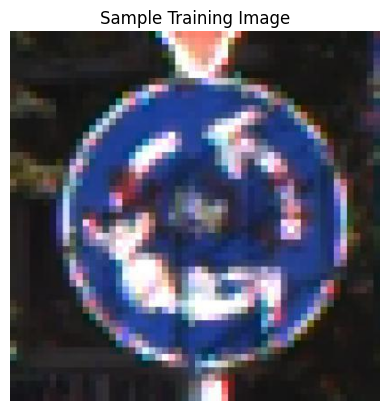

In [10]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/traffic_dataset/train/images/" + train_images[0]
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.title("Sample Training Image")
plt.show()


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
print("✅ YOLOv8 model loaded")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ YOLOv8 model loaded


In [12]:
model.train(
    data="/content/traffic_dataset/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0
)


Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/traffic_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e563845bce0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,   

In [15]:
import os
import shutil

source_path = "/content/runs/detect/train/weights/best.pt"
destination_dir = "/content/drive/MyDrive/trained_model"

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

destination_path = os.path.join(destination_dir, "best.pt")
shutil.copyfile(source_path, destination_path)

print(f"✅ Model saved to {destination_path}")

✅ Model saved to /content/drive/MyDrive/trained_model/best.pt


In [16]:
import os
import shutil

# Define source paths
runs_source_path = "/content/runs"
zip_source_path = "/content/Traffic and Road Signs.v1i.yolov9.zip"

# Define destination directories in Google Drive
drive_base_dir = "/content/drive/MyDrive/traffic_sign_project"
runs_destination_dir = os.path.join(drive_base_dir, "runs")
zip_destination_dir = os.path.join(drive_base_dir, "dataset_zip")

# Create destination directories if they don't exist
os.makedirs(runs_destination_dir, exist_ok=True)
os.makedirs(zip_destination_dir, exist_ok=True)

# Save the /content/runs directory
runs_destination_path = os.path.join(runs_destination_dir, os.path.basename(runs_source_path))

# Remove existing directory if it exists to avoid FileExistsError with copytree
if os.path.exists(runs_destination_path):
    shutil.rmtree(runs_destination_path)

shutil.copytree(runs_source_path, runs_destination_path)
print(f"✅ '/content/runs' directory saved to {runs_destination_path}")

# Save the original zip file
zip_destination_path = os.path.join(zip_destination_dir, os.path.basename(zip_source_path))
shutil.copyfile(zip_source_path, zip_destination_path)
print(f"✅ Original dataset zip file saved to {zip_destination_path}")

✅ '/content/runs' directory saved to /content/drive/MyDrive/traffic_sign_project/runs/runs
✅ Original dataset zip file saved to /content/drive/MyDrive/traffic_sign_project/dataset_zip/Traffic and Road Signs.v1i.yolov9.zip


(np.float64(-0.5), np.float64(2399.5), np.float64(1199.5), np.float64(-0.5))

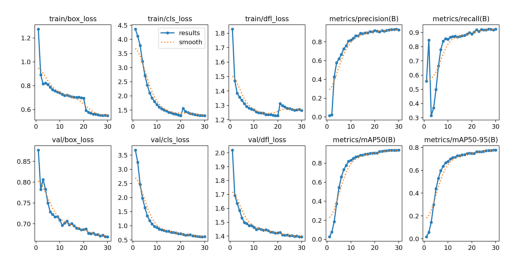

In [17]:
from PIL import Image

img = Image.open("runs/detect/train/results.png")
plt.imshow(img)
plt.axis("off")


In [18]:
best_model = YOLO("runs/detect/train/weights/best.pt")



image 1/1 /content/traffic_dataset/valid/images/00036_00000_00008_png_jpg.rf.6e84d2a251d979644affb04af4f987d4.jpg: 640x640 1 Go Straight or Turn Right, 9.1ms
Speed: 3.3ms preprocess, 9.1ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


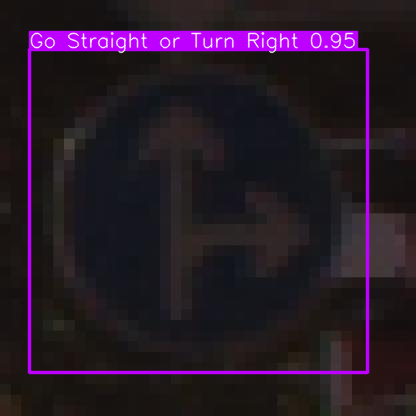

In [19]:
results = best_model(
    "/content/traffic_dataset/valid/images/" + os.listdir("/content/traffic_dataset/valid/images")[0],
    conf=0.5
)

results[0].show()


In [20]:
best_model = YOLO("runs/detect/train/weights/best.pt")

In [21]:
best_model.predict(
    source="/content/traffic_dataset/valid/images",
    save=True,
    conf=0.4
)


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1884 /content/traffic_dataset/valid/images/00000_00000_00001_png_jpg.rf.c5f9e0e188cdf4679b5cef322c1d9496.jpg: 640x640 1 50 mph speed limit, 7.1ms
image 2/1884 /content/traffic_dataset/valid/images/00000_00000_00002_png_jpg.rf.f0da67451fb72c16d88181bc87680b1b.jpg: 640x640 1 50 mph speed limit, 7.2ms
image 3/1884 /content/traffic_dataset/valid/images/00000_00000_00003_png_jpg.rf.bf657726b71cc4987aa7201acddd8bb4.jpg: 640x640 1 50 mph speed limit, 7.

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '-Road narrows on right', 1: '50 mph speed limit', 2: 'Attention Please-', 3: 'Beware of children', 4: 'CYCLE ROUTE AHEAD WARNING', 5: 'Dangerous Left Curve Ahead', 6: 'Dangerous Rright Curve Ahead', 7: 'End of all speed and passing limits', 8: 'Give Way', 9: 'Go Straight or Turn Right', 10: 'Go straight or turn left', 11: 'Keep-Left', 12: 'Keep-Right', 13: 'Left Zig Zag Traffic', 14: 'No Entry', 15: 'No_Over_Taking', 16: 'Overtaking by trucks is prohibited', 17: 'Pedestrian Crossing', 18: 'Round-About', 19: 'Slippery Road Ahead', 20: 'Speed Limit 20 KMPh', 21: 'Speed Limit 30 KMPh', 22: 'Stop_Sign', 23: 'Straight Ahead Only', 24: 'Traffic_signal', 25: 'Truck traffic is prohibited', 26: 'Turn left ahead', 27: 'Turn right ahead', 28: 'Uneven Road'}
 obb: None
 orig_img: array([[[ 74,  73,  69],
         [ 74,  73,  69],
         [ 74,  7

To view the predicted images, you can navigate to the `/content/runs/detect/predict` directory on the left file browser in Colab.

In [22]:
best_model.predict(
    source="/content/traffic_dataset/valid/images",
    save=True,
    conf=0.4
)



WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1884 /content/traffic_dataset/valid/images/00000_00000_00001_png_jpg.rf.c5f9e0e188cdf4679b5cef322c1d9496.jpg: 640x640 1 50 mph speed limit, 10.5ms
image 2/1884 /content/traffic_dataset/valid/images/00000_00000_00002_png_jpg.rf.f0da67451fb72c16d88181bc87680b1b.jpg: 640x640 1 50 mph speed limit, 7.3ms
image 3/1884 /content/traffic_dataset/valid/images/00000_00000_00003_png_jpg.rf.bf657726b71cc4987aa7201acddd8bb4.jpg: 640x640 1 50 mph speed limit, 7

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '-Road narrows on right', 1: '50 mph speed limit', 2: 'Attention Please-', 3: 'Beware of children', 4: 'CYCLE ROUTE AHEAD WARNING', 5: 'Dangerous Left Curve Ahead', 6: 'Dangerous Rright Curve Ahead', 7: 'End of all speed and passing limits', 8: 'Give Way', 9: 'Go Straight or Turn Right', 10: 'Go straight or turn left', 11: 'Keep-Left', 12: 'Keep-Right', 13: 'Left Zig Zag Traffic', 14: 'No Entry', 15: 'No_Over_Taking', 16: 'Overtaking by trucks is prohibited', 17: 'Pedestrian Crossing', 18: 'Round-About', 19: 'Slippery Road Ahead', 20: 'Speed Limit 20 KMPh', 21: 'Speed Limit 30 KMPh', 22: 'Stop_Sign', 23: 'Straight Ahead Only', 24: 'Traffic_signal', 25: 'Truck traffic is prohibited', 26: 'Turn left ahead', 27: 'Turn right ahead', 28: 'Uneven Road'}
 obb: None
 orig_img: array([[[ 74,  73,  69],
         [ 74,  73,  69],
         [ 74,  7

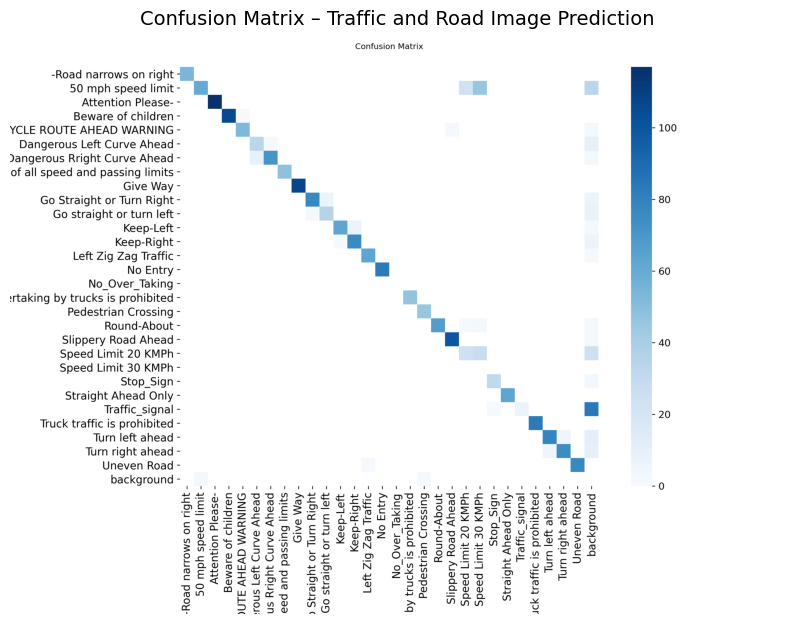

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

# Load confusion matrix image
cm_path = "runs/detect/train/confusion_matrix.png"
cm_img = Image.open(cm_path)

# Display
plt.figure(figsize=(10, 10))
plt.imshow(cm_img)
plt.axis("off")
plt.title("Confusion Matrix – Traffic and Road Image Prediction", fontsize=14)
plt.show()


Predicting: /content/traffic_dataset/valid/images/00024_00007_00003_png_jpg.rf.ab5b91bceb47857d64b2665e594c8c40.jpg

image 1/1 /content/traffic_dataset/valid/images/00024_00007_00003_png_jpg.rf.ab5b91bceb47857d64b2665e594c8c40.jpg: 640x640 1 -Road narrows on right, 9.2ms
Speed: 3.3ms preprocess, 9.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


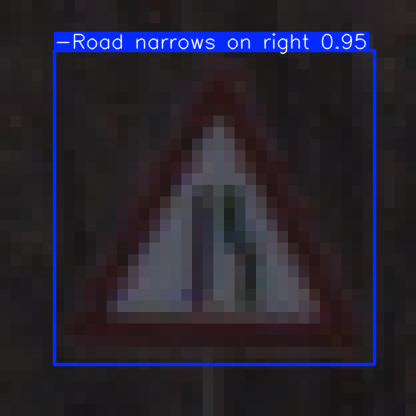

In [24]:
import os
import random

img_dir = "/content/traffic_dataset/valid/images"
img_name = random.choice(os.listdir(img_dir))
img_path = os.path.join(img_dir, img_name)

print("Predicting:", img_path)

results = best_model(img_path, conf=0.5)
results[0].show()

Predicting: /content/traffic_dataset/valid/images/00022_00008_00029_png_jpg.rf.4e37da9df59628fa0d44eae77063da4c.jpg

image 1/1 /content/traffic_dataset/valid/images/00022_00008_00029_png_jpg.rf.4e37da9df59628fa0d44eae77063da4c.jpg: 640x640 1 Uneven Road, 9.9ms
Speed: 3.1ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


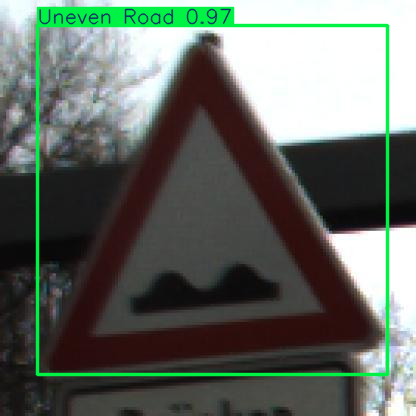

In [25]:
import os
import random

img_dir = "/content/traffic_dataset/valid/images"
img_name = random.choice(os.listdir(img_dir))
img_path = os.path.join(img_dir, img_name)

print("Predicting:", img_path)

results = best_model(img_path, conf=0.5)
results[0].show()

Predicting: /content/traffic_dataset/valid/images/00036_00010_00015_png_jpg.rf.97ece8312b7158a9bc5f6274a9570001.jpg

image 1/1 /content/traffic_dataset/valid/images/00036_00010_00015_png_jpg.rf.97ece8312b7158a9bc5f6274a9570001.jpg: 640x640 1 Go Straight or Turn Right, 9.2ms
Speed: 4.9ms preprocess, 9.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


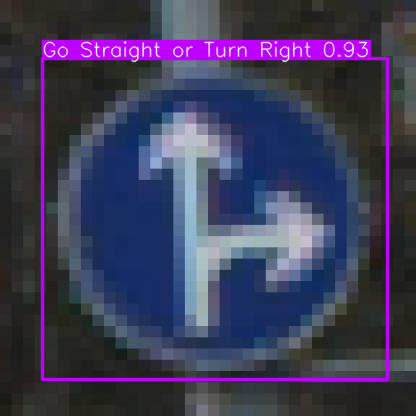

In [26]:
import os
import random

img_dir = "/content/traffic_dataset/valid/images"
img_name = random.choice(os.listdir(img_dir))
img_path = os.path.join(img_dir, img_name)

print("Predicting:", img_path)

results = best_model(img_path, conf=0.5)
results[0].show()

Predicting: /content/traffic_dataset/valid/images/00013_00061_00013_png_jpg.rf.c6b3e4006cc1beeb2bf59b421e96c689.jpg

image 1/1 /content/traffic_dataset/valid/images/00013_00061_00013_png_jpg.rf.c6b3e4006cc1beeb2bf59b421e96c689.jpg: 640x640 1 Give Way, 7.4ms
Speed: 2.5ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


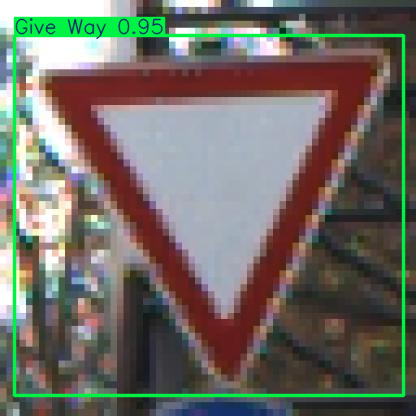

In [27]:
import os
import random

img_dir = "/content/traffic_dataset/valid/images"
img_name = random.choice(os.listdir(img_dir))
img_path = os.path.join(img_dir, img_name)

print("Predicting:", img_path)

results = best_model(img_path, conf=0.5)
results[0].show()

Predicting: /content/traffic_dataset/valid/images/00033_00021_00018_png_jpg.rf.775ec2e540c3299f0a7e94904c0cc723.jpg

image 1/1 /content/traffic_dataset/valid/images/00033_00021_00018_png_jpg.rf.775ec2e540c3299f0a7e94904c0cc723.jpg: 640x640 1 Turn right ahead, 10.0ms
Speed: 3.3ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


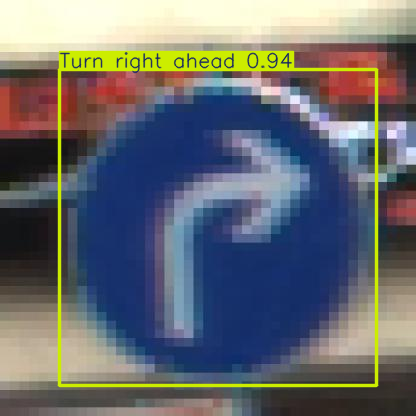

In [28]:
import os
import random

img_dir = "/content/traffic_dataset/valid/images"
img_name = random.choice(os.listdir(img_dir))
img_path = os.path.join(img_dir, img_name)

print("Predicting:", img_path)

results = best_model(img_path, conf=0.5)
results[0].show()